### Conor Cunningham

### CS 5304 Homework 2


---


**Assignment 2: Data Preparation**

In this assignment, you will practice how to prepare datasets for analysis. As real-world data usually comes with a variety of formats and might contain errors, we will use data cleaning method to prepare in to analysis. In this assignment, you will get your hands on a set of hourly weather data, and would be asked to load the dataset, apply data cleaning methods, and train a precipitation forecast model.

**Introduction**

The file _Hourly_Weather_Surface_Brazil_2_Cities.zip1_ contains hourly weather data from 2 weathers stations of a southeast region in Brazil. It includes 17 climate parameters from 2 weather stations, which should be comprehensive enough to perform precipitation forecast (rain prediction). However, since the weather stations are not always in working order and the data recording is not rigorous enough, there are a lot of missing fields, missing entries and obvious errors.

Your job in this assignment is to select one city of your choice, clean up the data and train a precipitation forecast model which takes history climate parameters as input and predicts the amount of precipitation in the upcoming hours.


---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
from datetime import datetime
from datetime import timedelta
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split


In [2]:
%matplotlib inline

**Data Cleaning**

One problem of the given data is the mixed use of zeros (0) and blank entry. For solar radiation (gbrd) column, while almost half of the entries are missing, common sense suggests that all the missing entries happen after sunset, when there is no sun at all (thus zero solar radiation). Thus in this scenario, imputation by constant values (0) is appropriate. Use data imputation, list-wise deletion and/or other methods of your choice to further clean the data. You only need to clean the features that you need for the next step.
1. This is based on a subset of “Hourly Weather Surface - Brazil (Southeast region)” dataset: https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region


In [3]:
# Read in the data
weather_data = pd.read_csv('data.csv', index_col=0)


In [4]:
# Print the data for reference
weather_data.head()


,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


In [5]:
# Display unique values from each category
for cat in weather_data.columns.values:
    print(cat, weather_data[cat].unique())


('wsid', array([178, 303]))
('wsnm', array(['S\xc3\x83O GON\xc3\x87ALO', 'VIT\xc3\x93RIA'], dtype=object))
('elvt', array([237,   9]))
('lat', array([ -6.835777, -20.271094]))
('lon', array([-38.311583, -40.306069]))
('inme', array(['A333', 'A612'], dtype=object))
('city', array(['S\xc3\xa3o Gon\xc3\xa7alo', 'Vit\xc3\xb3ria'], dtype=object))
('prov', array(['RJ', 'ES'], dtype=object))
('mdct', array(['2007-11-06 00:00:00', '2007-11-06 01:00:00',
       '2007-11-06 02:00:00', ..., '2007-11-05 21:00:00',
       '2007-11-05 22:00:00', '2007-11-05 23:00:00'], dtype=object))
('date', array(['2007-11-06', '2007-11-07', '2007-11-08', ..., '2007-11-03',
       '2007-11-04', '2007-11-05'], dtype=object))
('yr', array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2006]))
('mo', array([11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
('da', array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5, 31]))
('

('wdsp', array([ 3.2,  3.6,  2.5,  1.7,  3.1,  2. ,  1.3,  0.5,  nan,  3.3,  0. ,
        3.8,  3.7,  2.8,  2.9,  2.7,  1.5,  2.4,  3.4,  4.2,  5.4,  6.1,
        5. ,  1.9,  1.6,  0.7,  1.2,  2.1,  1.8,  4.6,  5.8,  4.7,  3. ,
        2.6,  3.9,  4. ,  2.3,  1.4,  0.3,  0.2,  4.3,  0.9,  1. ,  0.8,
        0.1,  3.5,  1.1,  0.4,  2.2,  4.1,  4.4,  4.5,  0.6,  4.9,  5.1,
        4.8,  5.6,  8.7,  5.7,  5.2,  6. ,  5.5,  5.3,  6.4,  5.9,  7.4,
        7.2,  7.5,  7.3,  7.6,  6.2,  6.7,  6.3,  6.5,  9.2,  8.3,  8. ,
        7. ,  6.8, 19.1]))
('wdct', array([101,  94,  93,  96, 110,  99, 157, 141, 248,  97,   0, 103,  78,
       102, 106, 123, 112, 109, 120, 114, 100, 111, 129,  85, 140, 127,
       108, 119, 134,  79,  66,  65,  89,  92, 104,  80, 128, 130, 146,
       147, 143,  88, 115, 137, 105, 116, 156, 124, 139,  91, 121,  95,
        87,  77,  84, 186,  32, 126, 159,  90, 113,  58,  49,  82,  63,
        64,  53,  40,  61,  56, 167, 144, 337,  26, 107,  81,  46,  67,
       118, 

In [6]:
# Validate that each timestamp occurs in hour intervals
weather_data_dates = pd.to_datetime(weather_data['mdct'])

for date_ndx, date in enumerate(weather_data_dates):
    if date_ndx + 1 < len(weather_data_dates):
        date_diff = (weather_data_dates[date_ndx + 1] - date)
        hours, remainder = divmod(date_diff.seconds, 3600)
        if hours != 1 and remainder > 0:
            print 'Timestamps not collected on the hour'
            

In [7]:
# Drop columns wsnm, elvt, lat, lon, inme, city, prov, mdct, date, yr, da, hr
# wsid is the only identifier needed for two weather stations
weather_data.drop(['wsnm'], axis = 1, inplace = True)
weather_data.drop(['elvt'], axis = 1, inplace = True)
weather_data.drop(['lat'], axis = 1, inplace = True)
weather_data.drop(['lon'], axis = 1, inplace = True)
weather_data.drop(['inme'], axis = 1, inplace = True)
weather_data.drop(['city'], axis = 1, inplace = True)
weather_data.drop(['prov'], axis = 1, inplace = True)
weather_data.drop(['mdct'], axis = 1, inplace = True)
weather_data.drop(['date'], axis = 1, inplace = True)
weather_data.drop(['yr'], axis = 1, inplace = True)
# Keep 'mo' for now - it is used for graphing
weather_data.drop(['da'], axis = 1, inplace = True)
weather_data.drop(['hr'], axis = 1, inplace = True)


In [8]:
# Get type of each column 
weather_data.info()  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165000 entries, 0 to 164999
Data columns (total 19 columns):
wsid    165000 non-null int64
mo      165000 non-null int64
prcp    20932 non-null float64
stp     165000 non-null float64
smax    165000 non-null float64
smin    165000 non-null float64
gbrd    95944 non-null float64
temp    165000 non-null float64
dewp    165000 non-null float64
tmax    165000 non-null float64
dmax    165000 non-null float64
tmin    165000 non-null float64
dmin    165000 non-null float64
hmdy    165000 non-null int64
hmax    165000 non-null int64
hmin    165000 non-null int64
wdsp    154867 non-null float64
wdct    165000 non-null int64
gust    162494 non-null float64
dtypes: float64(13), int64(6)
memory usage: 30.2 MB


In [9]:
# Calculate percentage of missing data per column 
(weather_data.isnull().sum() / float(len(weather_data))) * 100


wsid     0.000000
mo       0.000000
prcp    87.313939
stp      0.000000
smax     0.000000
smin     0.000000
gbrd    41.852121
temp     0.000000
dewp     0.000000
tmax     0.000000
dmax     0.000000
tmin     0.000000
dmin     0.000000
hmdy     0.000000
hmax     0.000000
hmin     0.000000
wdsp     6.141212
wdct     0.000000
gust     1.518788
dtype: float64

In [10]:
# Get info for each column
weather_data.describe()


,wsid,mo,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,165000.000000,165000.00000,20932.000000,165000.000000,165000.000000,165000.000000,95944.000000,165000.000000,165000.000000,165000.000000,165000.000000,165000.000000,165000.000000,165000.000000,165000.000000,165000.000000,154867.000000,165000.000000,162494.000000
mean,243.872727,6.48800,0.987235,948.605408,1017.064278,1001.243869,1366.557442,23.781758,17.433575,24.391782,17.945867,23.163552,16.910521,64.349158,67.204867,61.332885,1.766481,148.676782,4.762164
std,62.409120,3.44765,3.201479,325.451342,969.107965,903.448049,1206.075296,7.729353,5.696283,7.980918,5.790101,7.523014,5.653073,25.865932,25.906195,25.776696,1.176689,108.982372,2.833871
min,178.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178.000000,4.00000,0.000000,985.100000,985.400000,984.800000,119.486500,22.100000,16.300000,22.600000,16.900000,21.600000,15.600000,52.000000,56.000000,48.000000,0.900000,61.000000,2.500000
50%,303.000000,6.00000,0.000000,1009.400000,1009.700000,1008.900000,1186.652500,24.800000,18.900000,25.500000,19.500000,24.300000,18.400000,69.000000,73.000000,65.000000,1.600000,124.000000,4.700000
75%,303.000000,9.00000,0.600000,1016.000000,1016.300000,1015.700000,2399.667250,28.100000,21.000000,28.900000,21.500000,27.200000,20.500000,85.000000,88.000000,81.000000,2.600000,218.000000,6.800000
max,303.000000,12.00000,70.200000,8766.700000,45761.900000,43396.200000,4238.250000,38.600000,30.900000,39.300000,30.900000,38.000000,29.100000,100.000000,100.000000,100.000000,19.100000,360.000000,22.700000


In [11]:
# prcp, gbrd, wdsp, and gust contain nan values
# Note: A gust is a sudden increase of he wind’s speed -  most likely good indicator of weather

# Half of missing gbrd entries are probably due to it being night time - inpute 0's for nan's
# weather_data = weather_data.fillna(value={'gbrd':0})

# Inpute 0's for nan's in 'prcp' column
# weather_data = weather_data.fillna(value={'prcp':0})


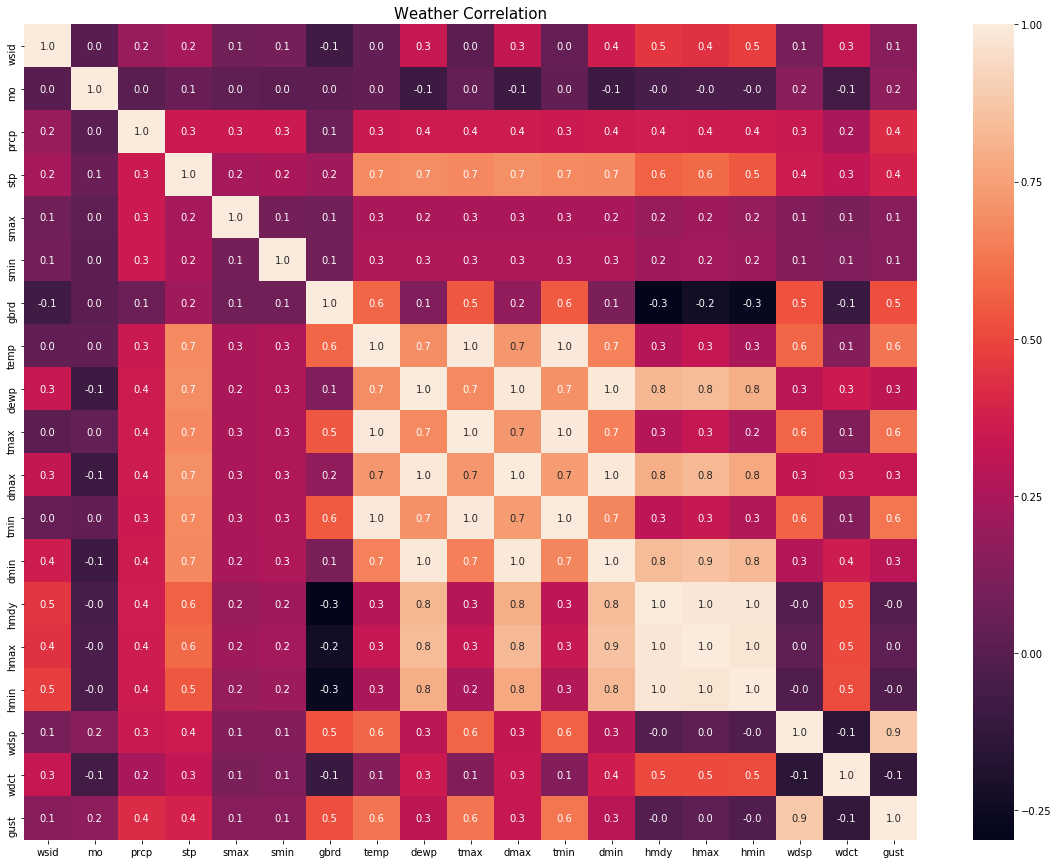

In [12]:
# Calculate and view Pearson's to gauge correlation strength
fig, axis = plt.subplots(figsize=(20, 15))
corr = weather_data.corr(method='pearson')
corr_heatmap = sns.heatmap(corr, annot=True, ax=axis, fmt='.1f').set_title('Weather Correlation', fontsize=15)
# fig.savefig('corr_heatmap')


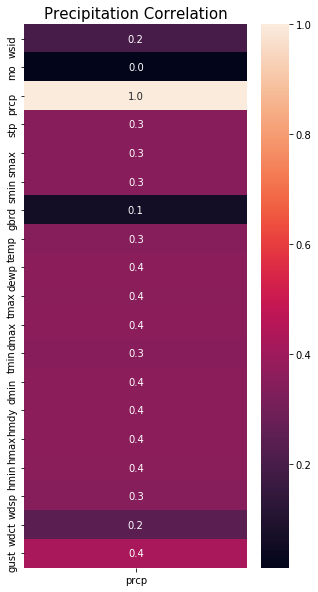

In [13]:
# Plot the correlation with emphasis on precipitation
fig, axis = plt.subplots(figsize=(5, 10))
corr = weather_data.corr(method='pearson')
corr_heatmap = sns.heatmap(corr['prcp'].to_frame(), annot=True, ax=axis, fmt='.1f').set_title('Precipitation Correlation', fontsize=15)
# fig.savefig('corr_prcp_heatmap')


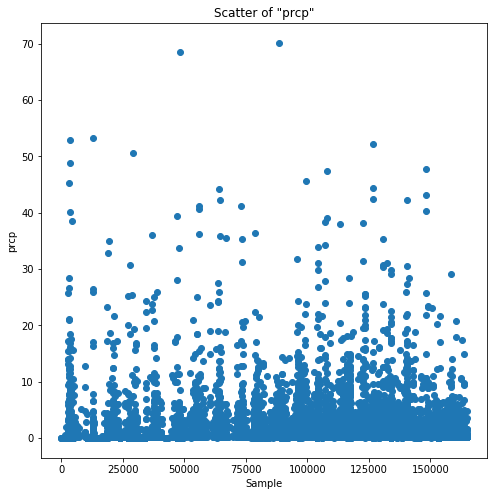

In [14]:
# Plot the prcp values
x = weather_data['prcp'].index
y = weather_data['prcp'].values

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y)
plt.xlabel('Sample')
plt.ylabel('prcp')
plt.title('Scatter of "prcp"')
# plt.savefig('prcp_dist')
plt.show()


In [15]:
# Split the data by weather station
vitoria_df = weather_data.drop(weather_data[weather_data['wsid'] == 178].index)
vitoria_df.drop(['wsid'], axis = 1, inplace = True)

sao_df = weather_data.drop(weather_data[weather_data['wsid'] == 303].index)
sao_df.drop(['wsid'], axis = 1, inplace = True)


In [16]:
# Calculate percentage of missing data per column 
print('Vitoria')
print(vitoria_df.isnull().sum() / float(len(vitoria_df))) * 100

# Calculate percentage of missing data per column 
print('Sao Goncalo')
print(sao_df.isnull().sum() / float(len(sao_df))) * 100


Vitoria
mo       0.000000
prcp    90.681065
stp      0.000000
smax     0.000000
smin     0.000000
gbrd    42.018585
temp     0.000000
dewp     0.000000
tmax     0.000000
dmax     0.000000
tmin     0.000000
dmin     0.000000
hmdy     0.000000
hmax     0.000000
hmin     0.000000
wdsp     0.000000
wdct     0.000000
gust     0.000000
dtype: float64
Sao Goncalo
mo       0.000000
prcp    83.562679
stp      0.000000
smax     0.000000
smin     0.000000
gbrd    41.666667
temp     0.000000
dewp     0.000000
tmax     0.000000
dmax     0.000000
tmin     0.000000
dmin     0.000000
hmdy     0.000000
hmax     0.000000
hmin     0.000000
wdsp    12.983036
wdct     0.000000
gust     3.210845
dtype: float64


In [17]:
# # Plot the prcp scatter per weather station

# # Plot scatter for Sao Goncalo
# x = sao_df['prcp'].index
# y = sao_df['prcp'].values
# plt.scatter(x, y)
# plt.xlabel('Sample')
# plt.ylabel('prcp')
# plt.title('Scatter of precip in Sao Goncalo')
# # plt.savefig('sao_prcp_scatter')
# plt.show()

# # Plot scatter for Vitoria
# x = vitoria_df['prcp'].index
# y = vitoria_df['prcp'].values
# plt.scatter(x, y)
# plt.xlabel('Sample')
# plt.ylabel('prcp')
# plt.title('Scatter of precip in Vitoria')
# # plt.savefig('vit_prcp_scatter')
# plt.show()

# # Plot the precipitation scatter per weather station per month
# MONTHS = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# plt.scatter(sao_df['mo'], sao_df['prcp'], label="Sao Goncalo precip")
# plt.scatter(vitoria_df['mo']+0.5, vitoria_df['prcp'], label="Vitoria precip", c='r')
# plt.legend(loc='best')
# plt.title("Precipitation scatterplot by month")
# plt.xlabel("Month")
# plt.ylabel("Inches of precipitation")
# plt.xticks(np.arange(1,13), MONTHS, rotation='vertical')
# # plt.savefig('prcp_per_month')
# plt.show()

# # Drop 'mo'
# vitoria_df.drop(['mo'], axis = 1, inplace = True)
# sao_df.drop(['mo'], axis = 1, inplace = True)


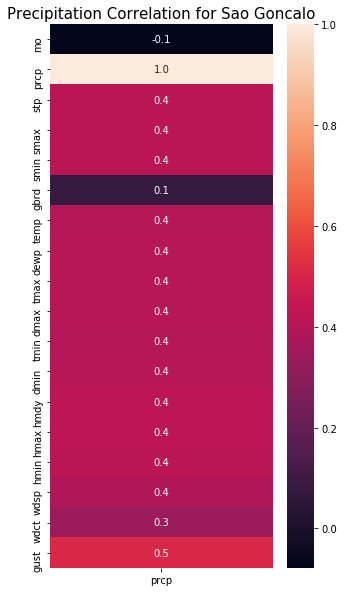

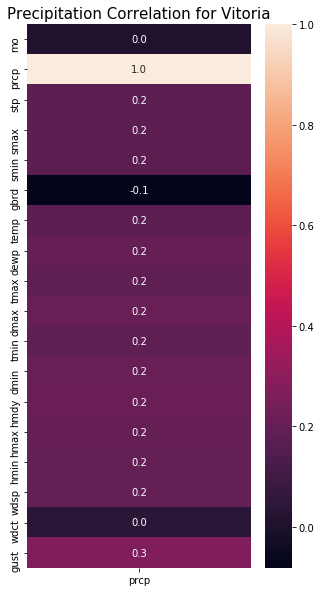

In [18]:
# Plot the correlation with emphasis on precipitation at Sao Goncalo
fig, axis = plt.subplots(figsize=(5, 10))
corr = sao_df.corr(method='pearson')
corr_heatmap = sns.heatmap(corr['prcp'].to_frame(), annot=True, ax=axis, fmt='.1f').set_title('Precipitation Correlation for Sao Goncalo', fontsize=15)
# fig.savefig('sao_corr_prcp_heatmap')

# Plot the correlation with emphasis on precipitation at Vitoria
fig, axis = plt.subplots(figsize=(5, 10))
corr = vitoria_df.corr(method='pearson')
corr_heatmap = sns.heatmap(corr['prcp'].to_frame(), annot=True, ax=axis, fmt='.1f').set_title('Precipitation Correlation for Vitoria', fontsize=15)
# fig.savefig('vit_corr_prcp_heatmap')


---

**Outlier Removal by Z-Score**

Due to some technical issues, there is a small portion of data containing erroneous records in air pressure related fields (stp, smax, smin). Use the z-score method to identify and remove those obvious outliers.


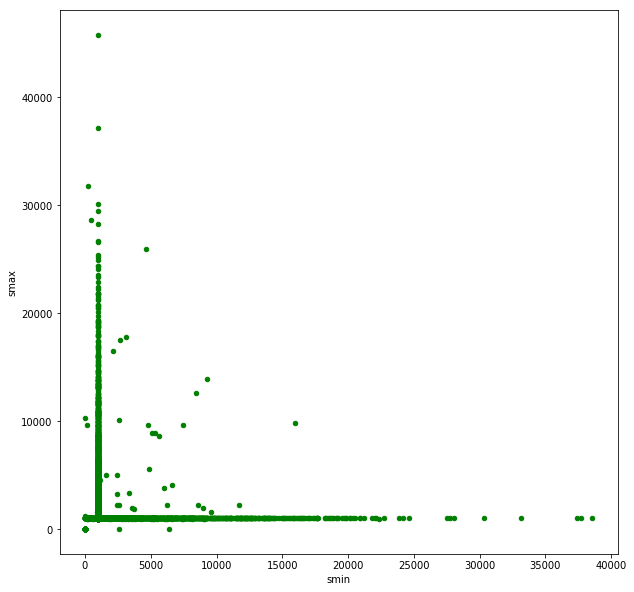

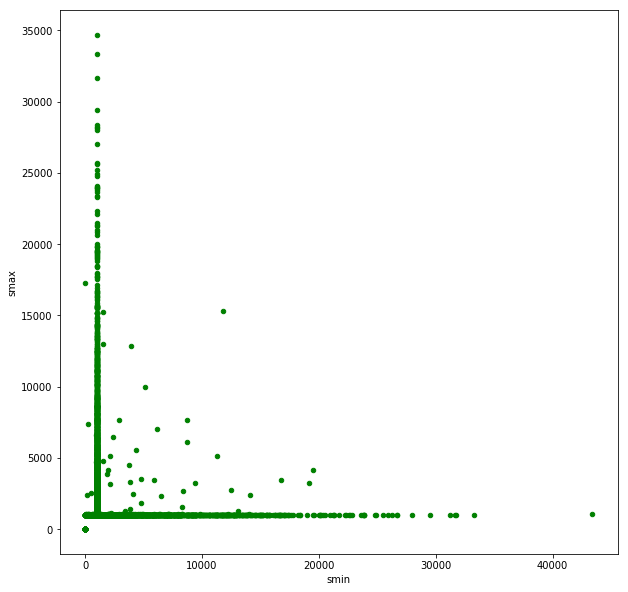

In [19]:
# Plot scatter plot of erroneous records for Sao Goncalo
sao_df.plot.scatter(x='smin',y='smax',c='g',figsize=(10,10))
# plt.savefig('sao_err_scatter')
plt.show()

# Plot scatter plot of erroneous records for Vitoria
vitoria_df.plot.scatter(x='smin',y='smax',c='g',figsize=(10,10))
# plt.savefig('vit_err_scatter')
plt.show()


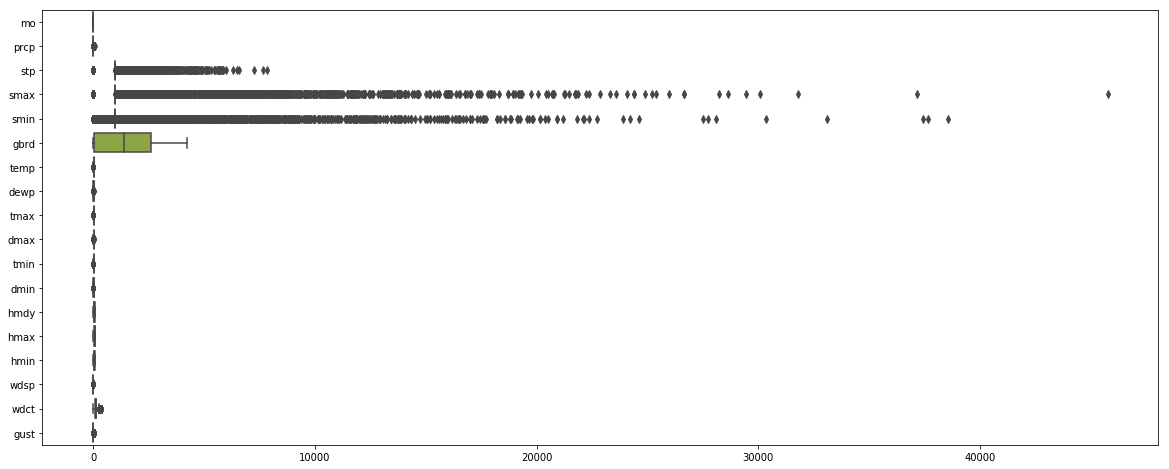

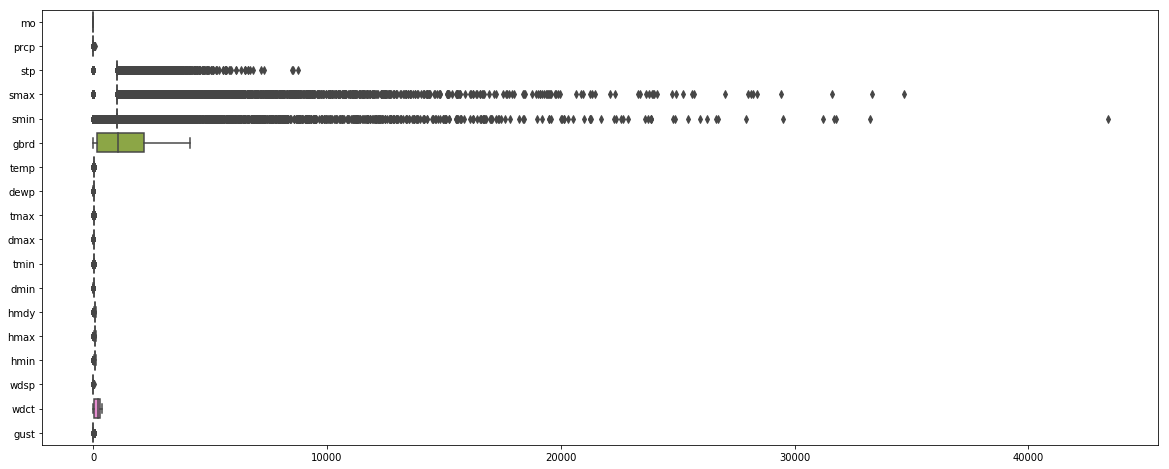

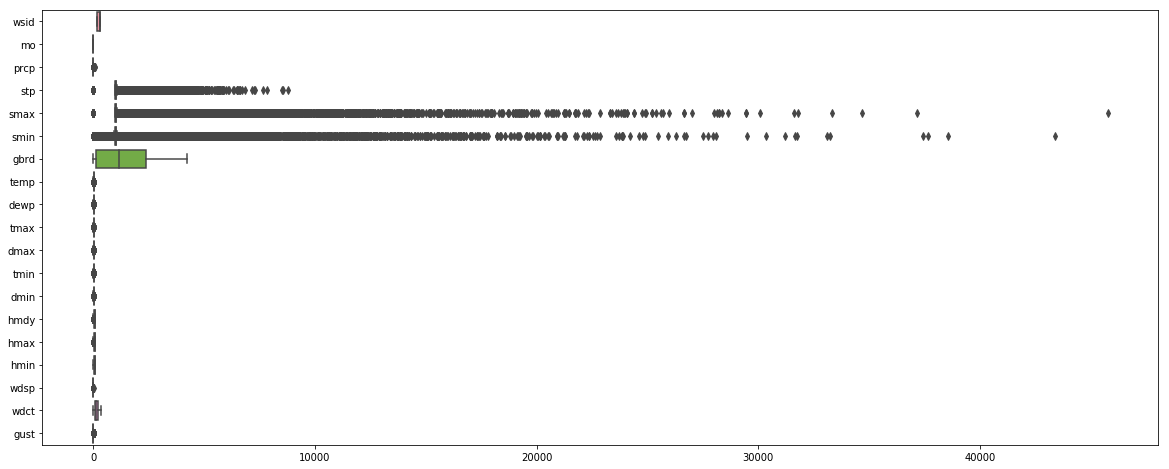

In [20]:
# lot IQR for Sao Goncalo
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=sao_df,orient="h")
# plt.savefig('sao_iqr')
plt.show(ax)

# Plot IQR for Vitoria
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=vitoria_df,orient="h")
# plt.savefig('vit_iqr')
plt.show(ax)

# Plot IQR for entire data set
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=weather_data,orient="h")
plt.show(ax)



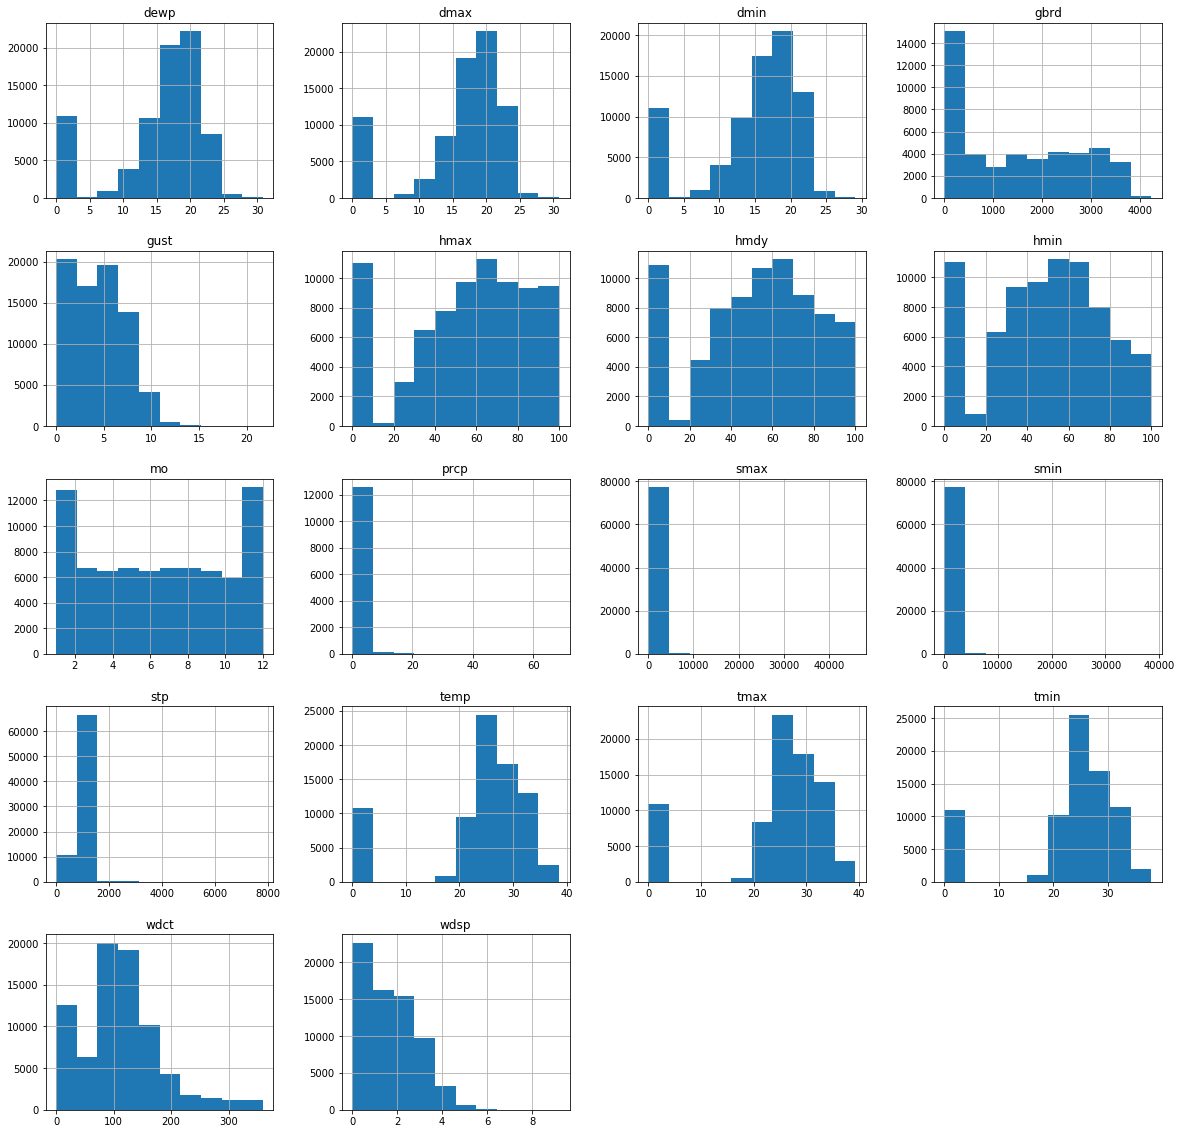

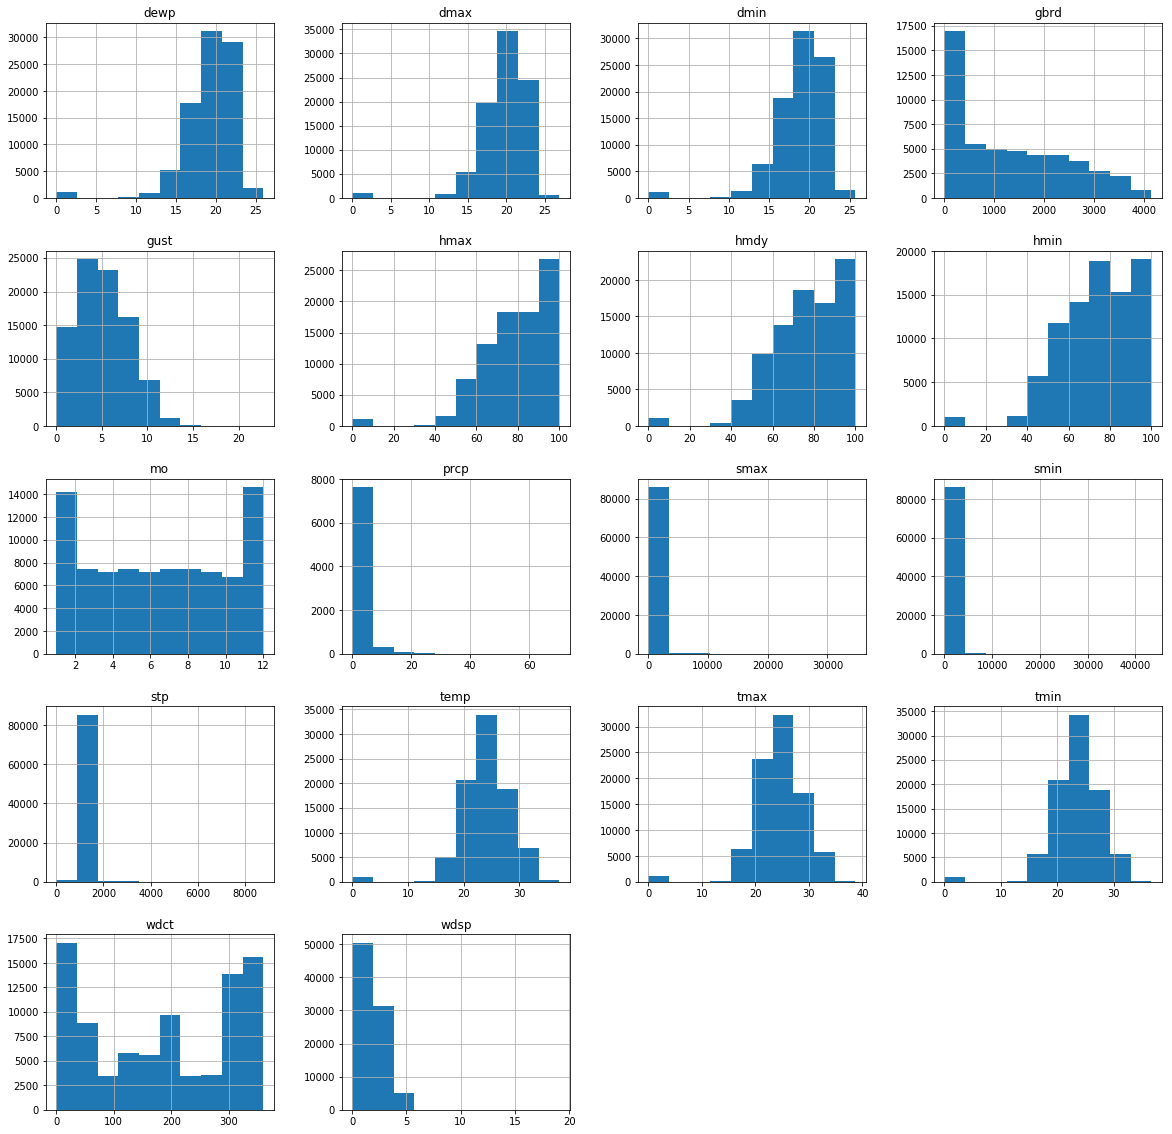

In [21]:
# From the above IQR, the smax, smin, stp, and gbrd columns need thresholding
# Plot histograms for Sao Goncalo
hist = sao_df.hist(bins=10, figsize=(20,20))

# Plot histograms for Vitoria
hist = vitoria_df.hist(bins=10, figsize=(20,20))


In [22]:
# Identify outliers with Z-score and set them to mean
# (https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns)
def set_outlier_to_mean(col):
    z_score = np.abs(stats.zscore(col))
    outlier_index = np.where(z_score > 3)

    np.put(z_score,outlier_index,np.nan)
    z_series = pd.Series(z_score)
    z_series = z_series.fillna(z_series.mean())
    return z_series


In [23]:
# # For Sao Goncalo
# stp_series = set_outlier_to_mean(sao_df['stp'].copy())
# smin_series = set_outlier_to_mean(sao_df['smin'])
# smax_series = set_outlier_to_mean(sao_df['smax'])
# gbrd_series = set_outlier_to_mean(sao_df['gbrd'])

# sao_df['stp'] = stp_series.values
# sao_df['smin'] = smin_series.values
# sao_df['smax'] = smax_series.values
# sao_df['gbrd'] = gbrd_series.values

# # Plot IQR for Sao Goncalo
# plt.figure(figsize=(20,8))
# ax = sns.boxplot(data=sao_df,orient="h")
# # plt.savefig('sao_iqr_clean')
# plt.show(ax)


In [24]:
# # For Vitoria
# stp_series = set_outlier_to_mean(vitoria_df['stp'].copy())
# smin_series = set_outlier_to_mean(vitoria_df['smin'])
# smax_series = set_outlier_to_mean(vitoria_df['smax'])
# gbrd_series = set_outlier_to_mean(vitoria_df['gbrd'])

# vitoria_df['stp'] = stp_series.values
# vitoria_df['smin'] = smin_series.values
# vitoria_df['smax'] = smax_series.values
# vitoria_df['gbrd'] = gbrd_series.values

# # Plot IQR for Vitoria
# plt.figure(figsize=(20,8))
# ax = sns.boxplot(data=sao_df,orient="h")
# # plt.savefig('vit_iqr_clean')
# plt.show(ax)


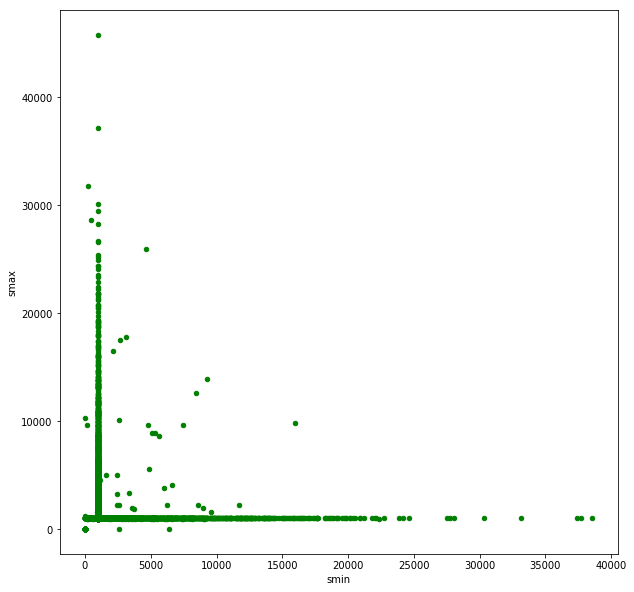

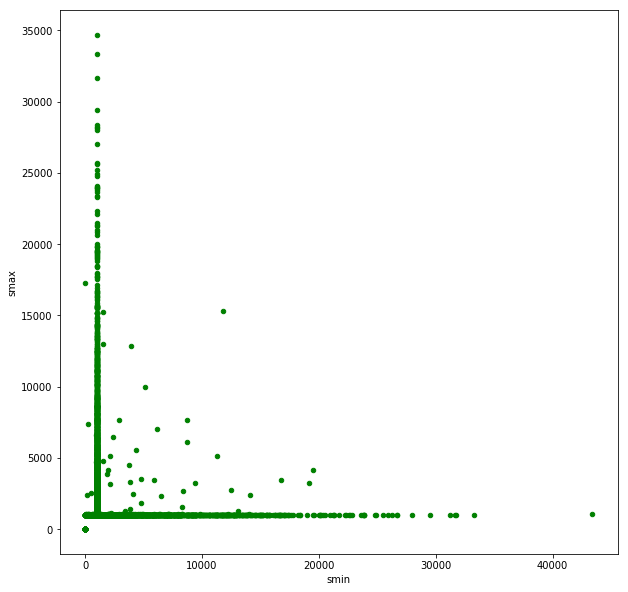

In [25]:
# Plot scatter plot of erroneous records for cleaned Sao Goncalo
sao_df.plot.scatter(x='smin',y='smax',c='g',figsize=(10,10))
# plt.savefig('sao_err_scatter_clean')
plt.show()

# Plot scatter plot of erroneous records for cleaned Vitoria
vitoria_df.plot.scatter(x='smin',y='smax',c='g',figsize=(10,10))
# plt.savefig('vit_err_scatter_clean')
plt.show()


In [26]:
# # Drop 'stp', 'smin', 'smax' for Sao Goncalo
# sao_df.drop(['stp'], axis = 1, inplace = True)
# sao_df.drop(['smin'], axis = 1, inplace = True)
# sao_df.drop(['smax'], axis = 1, inplace = True)

# # Drop 'stp', 'smin', 'smax' for Vitoria
# vitoria_df.drop(['stp'], axis = 1, inplace = True)
# vitoria_df.drop(['smin'], axis = 1, inplace = True)
# vitoria_df.drop(['smax'], axis = 1, inplace = True)


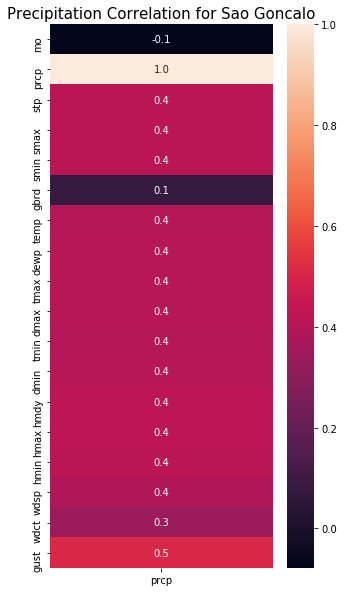

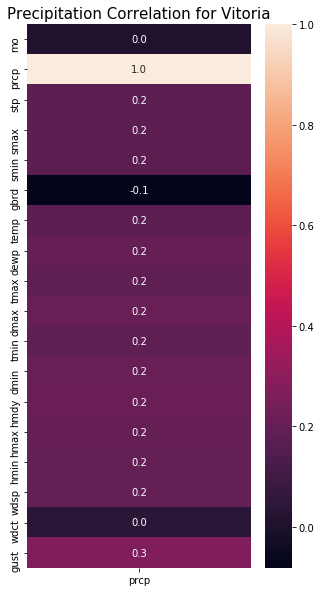

In [27]:
# Plot the correlation with emphasis on precipitation for Sao Goncalo for clean data
fig, axis = plt.subplots(figsize=(5, 10))
sao_corr = sao_df.corr(method='pearson')
corr_heatmap = sns.heatmap(sao_corr['prcp'].to_frame(), annot=True, ax=axis, fmt='.1f').set_title('Precipitation Correlation for Sao Goncalo', fontsize=15)
# fig.savefig('corr_sao_prcp_heatmap')

# Plot the correlation with emphasis on precipitation for Vitoria for clean data
fig, axis = plt.subplots(figsize=(5, 10))
vit_corr = vitoria_df.corr(method='pearson')
corr_heatmap = sns.heatmap(vit_corr['prcp'].to_frame(), annot=True, ax=axis, fmt='.1f').set_title('Precipitation Correlation for Vitoria', fontsize=15)
# fig.savefig('corr_vitoria_prcp_heatmap')


---

**Precipitation Forecast**

You will build a model that predict the amount of precipitation for the next hour, given the data of past 3 hours. You may choose whatever set of features you want and prepare the dataset accordingly.
Linear regression model alone may not work well for this task as there is a huge gap between rain and no rain. A better idea is to train two models:
- A binary logistic regression model that predicts whether it will rain in the next hour.
- A linear regression model predicting how much it will rain.

Report the detailed data cleaning procedures you use. Please provide reason for your every major design decision, such as why you perform certain data cleanings, and why you use certain parameters. Train the same model on both minimally cleaned dataset that has missing fields filled with zero and thoroughly cleaned dataset and report the performance of both models using appropriate metrics. How do removing outliers affects performance? Explain Why.



In [28]:
# Features ordered by correlation for Sao Goncalo
print(sao_corr['prcp'].abs().sort_values(ascending=False))

# Features ordered by correlation for Vitoria
print(vit_corr['prcp'].abs().sort_values(ascending=False))


prcp    1.000000
gust    0.509221
hmdy    0.426732
hmax    0.422588
smax    0.418380
smin    0.418316
stp     0.418149
hmin    0.417478
dmax    0.408458
dmin    0.406793
dewp    0.406542
tmax    0.406232
tmin    0.400626
temp    0.399157
wdsp    0.392910
wdct    0.340426
mo      0.078192
gbrd    0.076850
Name: prcp, dtype: float64
prcp    1.000000
gust    0.268033
hmdy    0.210657
dmax    0.206573
dmin    0.206123
dewp    0.204398
hmax    0.201850
hmin    0.201283
wdsp    0.197568
tmax    0.187236
tmin    0.181808
stp     0.178795
smax    0.178731
smin    0.178633
temp    0.177027
gbrd    0.081553
wdct    0.040858
mo      0.010304
Name: prcp, dtype: float64


In [29]:
# # Drop features that do not exhibit linear correlation w/ precip for Sao Goncalo
# sao_df.drop(['temp'], axis = 1, inplace = True)
# sao_df.drop(['wdsp'], axis = 1, inplace = True)
# sao_df.drop(['wdct'], axis = 1, inplace = True)
# sao_df.drop(['gbrd'], axis = 1, inplace = True)

# # Drop features that do not exhibit linear correlation w/ precip for Vitoria
# vitoria_df.drop(['temp'], axis = 1, inplace = True)
# vitoria_df.drop(['wdsp'], axis = 1, inplace = True)
# vitoria_df.drop(['wdct'], axis = 1, inplace = True)
# vitoria_df.drop(['gbrd'], axis = 1, inplace = True)

# # [u'prcp', u'dewp', u'tmax', u'dmax', u'tmin', u'dmin', u'hmdy', u'hmax', u'hmin', u'gust']
# assert(len(sao_df.columns) == 10)
# assert(len(vitoria_df.columns) == 10)


In [30]:
# Normalize Sao Goncalo
sao_norm_df = (sao_df - sao_df.mean()) / (sao_df.max() - sao_df.min())

# Normalize Vitoria
vitoria_norm_df = (vitoria_df - vitoria_df.mean()) / (vitoria_df.max() - vitoria_df.min())


In [ ]:
# Preprocess the data

# Methodology:
# - Iterate over window of 3 hours
# - For each 3 hour period, get weighted aggregate of each feature
#   - Most recent values have highest weight
# - Store each new feature, label 0,1 if NEXT hour has precip values

def create_historical_features(df, orig_df):
    if df.size < 3:
        return

    df = df.fillna(0)
    orig_labels = orig_df['prcp'].fillna(0)  
    end_index = int(df.shape[0]-1)

    hist_cols = df.columns.values  
    hist_feat = []
    hist_label = []
  
    for i in range(3,end_index):
        new_feat = []
        for col in hist_cols:
              new_feat.append(((df.iloc[i-1][col] * 3) + (df.iloc[i-2][col] * 2) +
                               (df.iloc[i-3][col]))/6.0)
        hist_feat.append(new_feat)
        hist_label.append(orig_labels.iloc[i])
   
    hist_feat = np.array(hist_feat)
    hist_feat = pd.DataFrame(hist_feat)
    hist_label = np.array(hist_label)
    hist_label = pd.DataFrame(hist_label)
    return hist_feat, hist_label

# Skip this for testing. Use feature files
X,Y = create_historical_features(vitoria_norm_df, vitoria_df)


In [ ]:
# # For faster processing, we stored the processed outputs in feature,
# # label files
# X = pd.read_csv('features.csv', index_col=0)
# Y = pd.read_csv('labels.csv', index_col=0)


In [ ]:
# Y stores values of precipitation - convert them to binary values
Y_classifier = np.array([1 if label > 0 else 0 for label in Y.values])
Y_classifier = pd.DataFrame(Y_classifier)


In [ ]:
# Split the training data
splits = 5
kf = model_selection.KFold(n_splits = splits)


In [ ]:
# Train and fit a logistic regression model on the training data
# Cross validate
for train_index, test_index in kf.split(X):
    
    X_train_cross = X.iloc[train_index]
    Y_train_cross = Y_classifier.iloc[train_index]
    X_test_cross  = X.iloc[test_index]  
    Y_test_cross  = Y_classifier.iloc[test_index]  

    # Convert labels to ints and reshape
    Y_train_len = len(Y_train_cross.values)
    Y_test_len  = len(Y_test_cross.values)
    Y_train_cross = (Y_train_cross.values.reshape(Y_train_len,)).astype('int')
    Y_test_cross  = (Y_test_cross.values.reshape(Y_test_len,)).astype('int')
    
    # Train multi-classification model with logistic regression
    LogReg = linear_model.LogisticRegression()
    LogReg.fit(X_train_cross, Y_train_cross)
 
    # Train multinomial logistic regression model
    # (http://dataaspirant.com/2017/05/15/implement-multinomial-logistic-regression-python/)
    LogRegMul = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
    LogRegMul.fit(X_train_cross, Y_train_cross)
    
    # Score each model
    print "Logistic regression Train Accuracy: ", metrics.accuracy_score(Y_train_cross, LogReg.predict(X_train_cross))
    print "Logistic regression Test Accuracy: ", metrics.accuracy_score(Y_test_cross, LogReg.predict(X_test_cross))
    
    print "Multinomial Logistic regression Train Accuracy: ", metrics.accuracy_score(Y_train_cross, LogRegMul.predict(X_train_cross))
    print "Multinomial Logistic regression Test Accuracy: ", metrics.accuracy_score(Y_test_cross, LogRegMul.predict(X_test_cross))


In [ ]:
# Sequester data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_classifier, test_size=0.3, random_state=0)

# Convert labels to ints and reshape
Y_train_len = len(Y_train.values)
Y_test_len  = len(Y_test.values)
Y_train = (Y_train.values.reshape(Y_train_len,)).astype('int')
Y_test  = (Y_test.values.reshape(Y_test_len,)).astype('int')

# Train multi-classification model with logistic regression
LogReg = linear_model.LogisticRegression()
LogReg.fit(X_train, Y_train)

# Calculate AUC and plot ROC
logit_roc_auc = roc_auc_score(Y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, LogReg.predict_proba(X_test)[:,1])

# Print accuracy, precision, and recall
print 'Logistic regression accuracy: ', metrics.accuracy_score(Y_test, LogReg.predict(X_test))
print 'Logistic regression precision-recall score: ', average_precision_score(Y_test, LogReg.decision_function(X_test))

# Plot
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('log_roc')
plt.show()


In [ ]:
# Train and fit a linear regression model on the training data
# Cross validate
for train_index, test_index in kf.split(X):
    
    X_train_cross = X.iloc[train_index]
    Y_train_cross = Y.iloc[train_index]
    X_test_cross  = X.iloc[test_index]  
    Y_test_cross  = Y.iloc[test_index]  

    # Convert labels to ints and reshape
    Y_train_len = len(Y_train_cross.values)
    Y_test_len  = len(Y_test_cross.values)
    Y_train_cross = (Y_train_cross.values.reshape(Y_train_len,)).astype('int')
    Y_test_cross  = (Y_test_cross.values.reshape(Y_test_len,)).astype('int')
    
    # Train linear regression model
    LinReg = LinearRegression()
    LinReg.fit(X_train_cross, Y_train_cross)
    
    # Score the model
    Y_pred = LinReg.predict(X_test_cross)
    Y_pred[Y_pred < 0] = 0
    print "MSE for Linear Regression:", mean_squared_error(Y_pred, Y_test_cross)


In [ ]:
# Sequester data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Convert labels to ints and reshape
Y_train_len = len(Y_train.values)
Y_test_len  = len(Y_test.values)
Y_train = (Y_train.values.reshape(Y_train_len,)).astype('int')
Y_test  = (Y_test.values.reshape(Y_test_len,)).astype('int')

# Train the linear regression model
LinReg = LinearRegression()
LinReg.fit(X_train, Y_train)

# Score the model
Y_pred = LinReg.predict(X_test)
Y_pred[Y_pred < 0] = 0

print "MAE for Linear Regression:", metrics.mean_absolute_error(Y_test, Y_pred)
print "MSE for Linear Regression:", mean_squared_error(Y_test, Y_pred)
print "RMSE for Linear Regression:", np.sqrt(mean_squared_error(Y_test, Y_pred))

# Plot the graph
plt.scatter(Y_pred, Y_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')
# plt.savefig('linear_scatter')
plt.show()


In [ ]:
# Create the pipeline 

# Cross validate
for train_index, test_index in kf.split(X):
    
    X_train_cross = X.iloc[train_index]
    Y_train_cross = Y.iloc[train_index]
    X_test_cross  = X.iloc[test_index]  
    Y_test_cross  = Y.iloc[test_index]  

    # Y stores values of precipitation - convert them to binary values
    Y_class_train_cross = np.array([1 if label > 0 else 0 for label in Y_train_cross.values])
    Y_class_train_cross = pd.DataFrame(Y_class_train_cross)

    # Convert labels to ints and reshape
    Y_train_len = len(Y_train_cross.values)
    Y_test_len  = len(Y_test_cross.values)
    Y_class_train_len = len(Y_class_train_cross.values)
    Y_train_cross = (Y_train_cross.values.reshape(Y_train_len,)).astype('int')
    Y_test_cross  = (Y_test_cross.values.reshape(Y_test_len,)).astype('int')
    Y_class_train_cross  = (Y_class_train_cross.values.reshape(Y_class_train_len,)).astype('int')

    # Train multi-classification model with logistic regression
    LogReg = linear_model.LogisticRegression()
    LogReg.fit(X_train_cross, Y_class_train_cross)
    
    # Train linear regression model
    LinReg = LinearRegression()
    LinReg.fit(X_train_cross, Y_train_cross)
    
    # Predict if it rains or not
    rain_check = LogReg.predict(X_test_cross)
    
    # Predict amount of rain
    rain_fall = LinReg.predict(X_test_cross)
    
    # If we predicted it won't rain - overwrite the prediction to 0
    for ndx, pred in enumerate(rain_fall):
        if rain_check[ndx] == 0:
            rain_fall[ndx] = 0

    # Threshold the remaining predictions
    rain_fall[rain_fall < 0] = 0
    
    print "MAE for Regression pipeline:", metrics.mean_absolute_error(Y_test_cross, rain_fall)
    print "MSE for Regression pipeline:", mean_squared_error(Y_test_cross, rain_fall)
    print "RMSE for Regression pipeline:", np.sqrt(mean_squared_error(Y_test_cross, rain_fall))


In [ ]:
# Run and test the pipeline without cross-validation

# Sequester data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Y stores values of precipitation - convert them to binary values
Y_class_train = np.array([1 if label > 0 else 0 for label in Y_train.values])
Y_class_train = pd.DataFrame(Y_class_train)

# Convert labels to ints and reshape
Y_train_len = len(Y_train.values)
Y_test_len  = len(Y_test.values)
Y_class_train_len = len(Y_class_train.values)
Y_train = (Y_train.values.reshape(Y_train_len,)).astype('int')
Y_test  = (Y_test.values.reshape(Y_test_len,)).astype('int')
Y_class_train  = (Y_class_train.values.reshape(Y_class_train_len,)).astype('int')

# Train multi-classification model with logistic regression
LogReg = linear_model.LogisticRegression()
LogReg.fit(X_train, Y_class_train)

# Train linear regression model
LinReg = LinearRegression()
LinReg.fit(X_train, Y_train)

# Predict if it rains or not
rain_check = LogReg.predict(X_test)

# Predict amount of rain
rain_fall = LinReg.predict(X_test)

# If we predicted it won't rain - overwrite the prediction to 0
for ndx, pred in enumerate(rain_fall):
    if rain_check[ndx] == 0:
        rain_fall[ndx] = 0

# Threshold the remaining predictions
rain_fall[rain_fall < 0] = 0

print "MAE for Regression pipeline:", metrics.mean_absolute_error(Y_test, rain_fall)
print "MSE for Regression pipeline:", mean_squared_error(Y_test, rain_fall)
print "RMSE for Regression pipeline:", np.sqrt(mean_squared_error(Y_test, rain_fall))

# Plot the graph
plt.scatter(rain_fall, Y_test)
plt.xlabel('Predictions')
plt.ylabel('True Values')
# plt.savefig('pipe_scatter')
plt.show()


---

**Bonus**

As an optional opportunity for those who want to receive a small extra credit, finish one or two of the following tasks:
- Extend your model to do longer term (5 hour, 10 hour, 1-5 hours, etc) precipitation forecast.
- Evaluate your prediction model on the data of another city. Does the model trained for one city transfer well to the other city?

---

**Appendix**

Explanations of data fields in the provided data:

wsid - Weather station id

wsnm - Name station (usually city location or nickname)

elvt - Elevation

lat - Latitude

lon - Longitude

inme - Station number (INMET number) for the location

city - City

prov - State (Province)

mdct - Observation Datetime (complete date: date + time)

date - Date of observation

yr - The year (2000-2016)

mo - The month (0-12)

da - The day (0-31)

hr - The hour (0-23)

prcp - Amount of precipitation in millimetres (last hour)

stp - Air pressure for the hour in hPa to tenths (instant)

smax - Maximum air pressure for the last hour in hPa to tenths

smin - Minimum air pressure for the last hour in hPa to tenths

gbrd - Solar radiation KJ/m2

temp - Air temperature (instant) in celsius degrees

dewp - Dew point temperature (instant) in celsius degrees

tmax - Maximum temperature for the last hour in celsius degrees

dmax - Maximum dew point temperature for the last hour in celsius degrees

tmin - Minimum temperature for the last hour in celsius degrees

dmin - Minimum dew point temperature for the last hour in celsius degrees

hmdy - Relative humid in % (instant)

hmax - Maximum relative humid temperature for the last hour in %

hmin - Minimum relative humid temperature for the last hour in %

wdsp - Wind speed in metres per second

wdct - Wind direction in radius degrees (0-360)

gust - Wind gust in metres per second

In [ ]:
#### SCRATCH ####

# Preprocess the data

# Methodology:
# - Iterate over window of 3 hours
# - For each 3 hour period, get weighted aggregate of each feature
#   - Most recent values have highest weight
# - Store each new feature, label 0,1 if NEXT hour has precip values
# def create_historical_features(df):

#     window = 4
#     index = 0

#     labels = []
#     features = []

#     while (index + window) < len(df.index):
#         start_interval = index
#         stop_interval = window + index

#         # Get interval
#         interval = df.iloc[start_interval:stop_interval, :]
#         past_3_hours = df.iloc[start_interval: stop_interval - 1, :]
#         next_hour = df.iloc[stop_interval - 1]

#         # Weight each row
#         past_3_hours.loc[0, :] = past_3_hours.iloc[0, :].multiply(1)
#         past_3_hours.loc[1, :] = past_3_hours.iloc[1, :].multiply(2)
#         past_3_hours.loc[2, :] = past_3_hours.iloc[2, :].multiply(3)

#         # Aggregate each column
#         past_3_hours = past_3_hours.sum(axis=0)

#         # Divide by weighted average
#         past_3_hours = past_3_hours.divide(6)

#         features.append(features)

#         # Define label
#         if np.isnan(next_hour['prcp']):
#             label = 0
#         else:
#             label = 1 if next_hour['prcp'] > 0 else 0

#         labels.append(label)

#         index += 1

#     return features, labels

# X, Y = create_historical_features(sao_df)
